In [1]:
## estudando caos de empresas que viraram unicórnios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## trazendo a base de dados

dados = pd.read_csv('Startups+in+2021+end.csv')

dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [3]:
dados.shape

(936, 8)

In [4]:
## renomear

dados.rename(columns={
    'Unnamed: 0': 'Id',
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor ($)',
    'Date Joined': 'Data de Adesão',
    'Country': 'Pais',
    'City': 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True)

In [5]:
## verificar tipo da informação

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [6]:
## checando os nulos

dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

<AxesSubplot:>

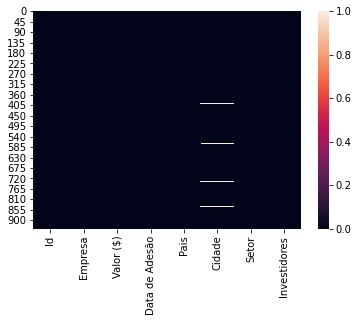

In [7]:
## gráfico

sns.heatmap(dados.isnull())

In [8]:
## campos unicos

dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [9]:
## valores únicos - rank

dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

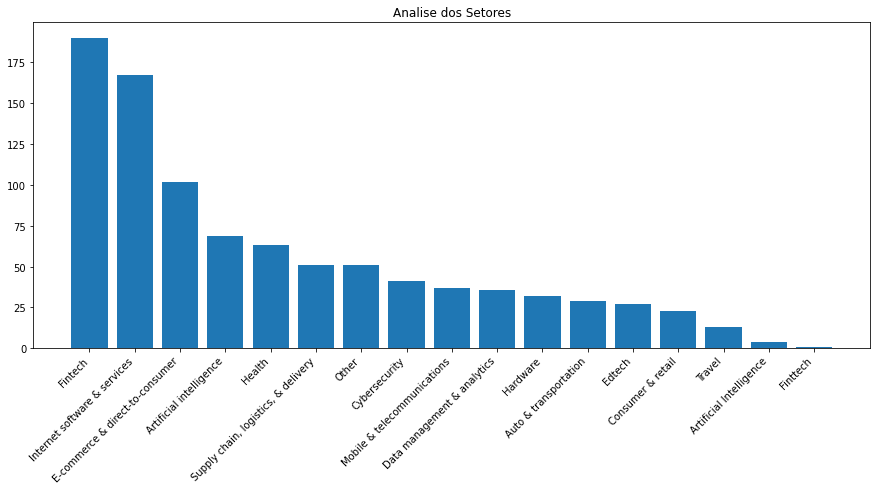

In [10]:
## enxergando de forma visual
plt.figure(figsize=(15,6))
plt.title('Analise dos Setores')
plt.bar(dados['Setor'].value_counts().index, dados['Setor'].value_counts())
plt.xticks(rotation=45, ha='right');

In [11]:
analise = round(dados['Pais'].value_counts(normalize=True)*100,1)

In [12]:
analise

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

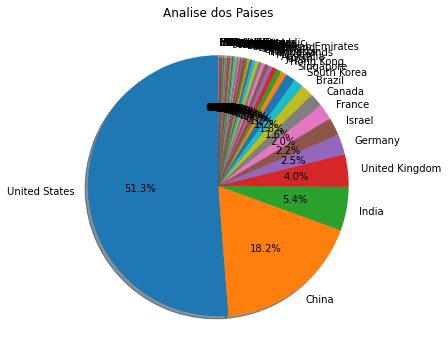

In [13]:
plt.figure(figsize=(15,6))
plt.title('Analise dos Paises')
plt.pie(analise,
       labels= analise.index,
       shadow=True,
       startangle=90,
       autopct='%1.1f%%');

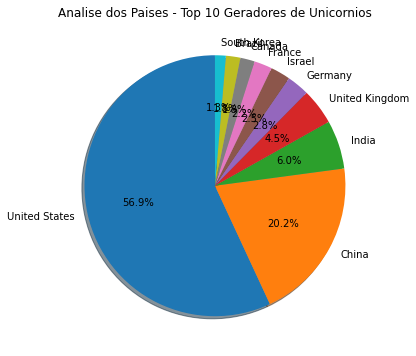

In [14]:
## top 10 - Paises

plt.figure(figsize=(15,6))
plt.title('Analise dos Paises - Top 10 Geradores de Unicornios')
plt.pie(analise.head(10),
       labels= analise.index[0:10],
       shadow=True,
       startangle=90,
       autopct='%1.1f%%');

In [15]:
## conversão para data

dados['Data de Adesão'] = pd.to_datetime(dados['Data de Adesão'])

dados['Data de Adesão'].dtypes

dtype('<M8[ns]')

In [16]:
## extrair o mês e o ano

dados['Mes'] = pd.DatetimeIndex(dados['Data de Adesão']).month
dados['Ano'] = pd.DatetimeIndex(dados['Data de Adesão']).year

In [17]:
dados

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,$1,2021-12-06,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ...",12,2021
932,932,Anyscale,$1,2021-12-07,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation...",12,2021
933,933,Iodine Software,$1,2021-12-01,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S...",12,2021
934,934,ReliaQuest,$1,2021-12-01,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures",12,2021


In [18]:
## tabela analítica

analise_agrupada = dados.groupby(by=['Pais', 'Ano', 'Mes']).count()['Id'].reset_index()

analise_agrupada.head()

,Pais,Ano,Mes,Id
0,Argentina,2021,8,1
1,Australia,2018,1,1
2,Australia,2019,3,1
3,Australia,2021,5,1
4,Australia,2021,7,2


In [19]:
analise_agrupada.loc[analise_agrupada['Pais']=='Brazil']

,Pais,Ano,Mes,Id
11,Brazil,2018,3,1
12,Brazil,2018,7,1
13,Brazil,2018,11,1
14,Brazil,2019,6,1
15,Brazil,2019,9,1
16,Brazil,2019,10,1
17,Brazil,2019,12,1
18,Brazil,2020,1,1
19,Brazil,2020,12,2
20,Brazil,2021,1,1


In [20]:
## transformando a coluna valor

dados['Valor ($)'] = pd.to_numeric(dados['Valor ($)'].apply(lambda linhda: linhda.replace('$', '')))

dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [26]:
## analises de paises

paises = dados.groupby(by=['Pais']).sum()['Valor ($)'].reset_index().sort_values('Valor ($)', ascending=False)

paises.head()

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


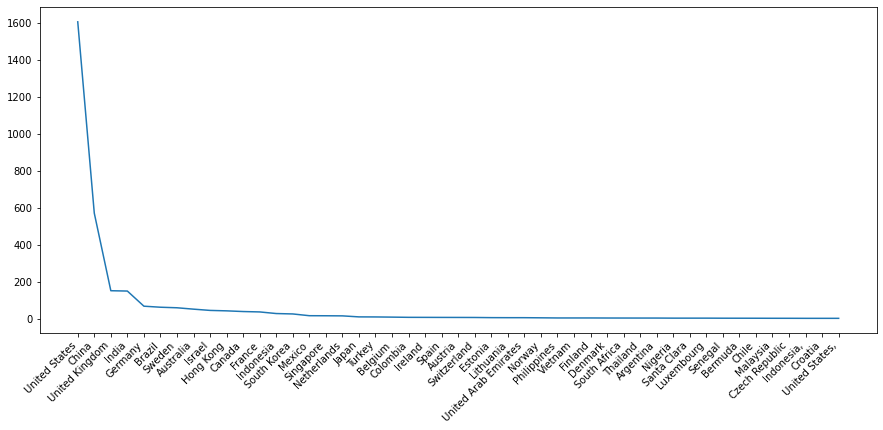

In [28]:
## gráfico de valuation dos unicórnios

plt.figure(figsize=(15,6))
plt.plot(paises['Pais'], paises['Valor ($)'])
plt.xticks(rotation=45, ha='right');